**Petrol Consumption Prediction**

In this problem statement, with respect to each country they have given the petrol tax, average income of the population, total paved highways and population driver licence(%), we have to predict the petrol consumption of each country based on the given features.


*   Since there is a prediction involved, it will be a Supervised Learning problem.
*   As we are trying to predict a continuous target variable, it will be a Regression problem.



***Importing important libraries***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

***Loading the dataset***

In [2]:
data = pd.read_csv('petrol_consumption.csv')
data.shape

(48, 5)

There are 48 rows and 5 columns in this dataset.

***Data cleaning*** 

Analysing the data and cleaning them by checking for

*  Unstructured data
*  Data in wrong format
*  Missing data
*  Duplicates
*  Outliers

In [3]:
data.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


This data is in structured format.

In [4]:
data.dtypes

Petrol_tax                      float64
Average_income                    int64
Paved_Highways                    int64
Population_Driver_licence(%)    float64
Petrol_Consumption                int64
dtype: object

All the columns in the dataset are in right format.

In [5]:
data.isnull().sum()

Petrol_tax                      0
Average_income                  0
Paved_Highways                  0
Population_Driver_licence(%)    0
Petrol_Consumption              0
dtype: int64

There are no missing values in the dataset.

In [6]:
data = data.drop_duplicates()
data.shape

(48, 5)

There are no duplicates in the dataset.

In [7]:
data.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


These are the statistical measures of the data.

Checking for outliers in all the columns:

In [8]:
# Petrol_tax
iqr = data.Petrol_tax.quantile(0.75) - data.Petrol_tax.quantile(0.25)
print('IQR :',iqr)
upper_threshold = data.Petrol_tax.quantile(0.75) + (1.5 * iqr)
print('Upper Threshold :', upper_threshold)
lower_threshold = data.Petrol_tax.quantile(0.25) - (1.5 * iqr)
print('Lower Threshold :', lower_threshold)

IQR : 1.125
Upper Threshold : 9.8125
Lower Threshold : 5.3125


In [9]:
# Average_income
iqr = data.Average_income.quantile(0.75) - data.Average_income.quantile(0.25)
print('IQR :',iqr)
upper_threshold = data.Average_income.quantile(0.75) + (1.5 * iqr)
print('Upper Threshold :', upper_threshold)
lower_threshold = data.Average_income.quantile(0.25) - (1.5 * iqr)
print('Lower Threshold :', lower_threshold)

IQR : 839.75
Upper Threshold : 5838.375
Lower Threshold : 2479.375


In [10]:
# Paved_Highways
iqr = data.Paved_Highways.quantile(0.75) - data.Paved_Highways.quantile(0.25)
print('IQR :',iqr)
upper_threshold = data.Paved_Highways.quantile(0.75) + (1.5 * iqr)
print('Upper Threshold :', upper_threshold)
lower_threshold = data.Paved_Highways.quantile(0.25) - (1.5 * iqr)
print('Lower Threshold :', lower_threshold)

IQR : 4045.75
Upper Threshold : 13224.625
Lower Threshold : -2958.375


Since there are outliers in Paved_Highways, we are treating the outliers by clipping the data.

In [11]:
data.Paved_Highways = data.Paved_Highways.clip(-2958.375,13224.625)

In [12]:
# Population_Driver_licence(%)
iqr = data['Population_Driver_licence(%)'].quantile(0.75) - data['Population_Driver_licence(%)'].quantile(0.25)
print('IQR :',iqr)
upper_threshold = data['Population_Driver_licence(%)'].quantile(0.75) + (1.5 * iqr)
print('Upper Threshold :', upper_threshold)
lower_threshold = data['Population_Driver_licence(%)'].quantile(0.25) - (1.5 * iqr)
print('Lower Threshold :', lower_threshold)

IQR : 0.06549999999999989
Upper Threshold : 0.6934999999999998
Lower Threshold : 0.4315000000000002


***Exploratory Data Analysis***

Plotting the data and trying to understand the patterns and relationships in the data.

Following are the distribution of features plots:

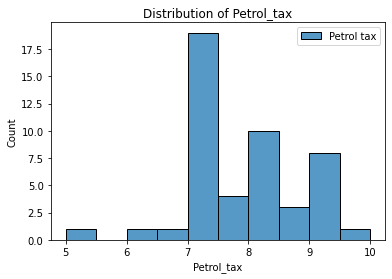

In [13]:
# Petrol_tax
sns.histplot(data['Petrol_tax'], label = 'Petrol tax', bins = 10)
plt.title('Distribution of Petrol_tax')
plt.legend()
plt.show()

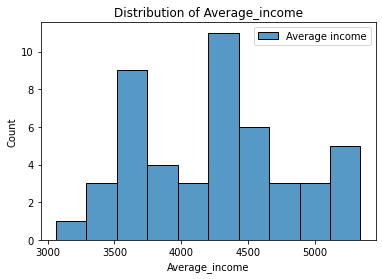

In [14]:
# Average_income
sns.histplot(data['Average_income'], label = 'Average income', bins = 10)
plt.title('Distribution of Average_income')
plt.legend()
plt.show()

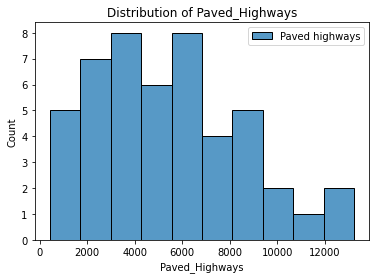

In [15]:
# Paved_Highways
sns.histplot(data['Paved_Highways'], label = 'Paved highways', bins = 10)
plt.title('Distribution of Paved_Highways')
plt.legend()
plt.show()

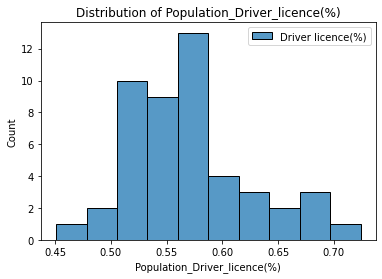

In [16]:
# Population_Driver_licence(%)
sns.histplot(data['Population_Driver_licence(%)'], label = 'Driver licence(%)', bins = 10)
plt.title('Distribution of Population_Driver_licence(%)')
plt.legend()
plt.show()

Following are the feature vs target plots:

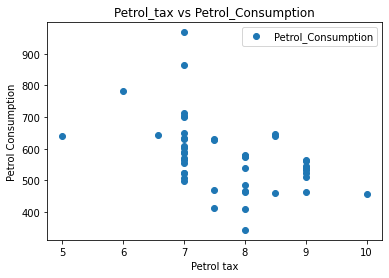

In [17]:
# Petrol_tax vs Petrol_Consumption
data.plot(x = 'Petrol_tax', y = 'Petrol_Consumption', style = 'o')
plt.title('Petrol_tax vs Petrol_Consumption')
plt.xlabel('Petrol tax')
plt.ylabel('Petrol Consumption')
plt.show()

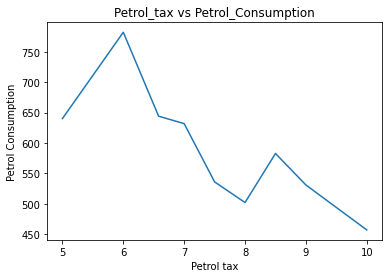

In [18]:
data.groupby('Petrol_tax')['Petrol_Consumption'].mean().plot()
plt.title('Petrol_tax vs Petrol_Consumption')
plt.xlabel('Petrol tax')
plt.ylabel('Petrol Consumption')
plt.show()

In [19]:
data[['Petrol_tax','Petrol_Consumption']].corr()

,Petrol_tax,Petrol_Consumption
Petrol_tax,1.00000,-0.45128
Petrol_Consumption,-0.45128,1.00000


As we can see from the graph and by calculating correlation, we can say there is a linear relationship between petrol_tax and petrol_consumption.

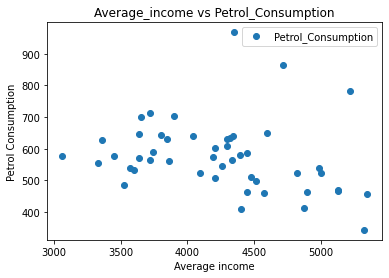

In [20]:
# Average_income vs Petrol_Consumption
data.plot(x = 'Average_income', y = 'Petrol_Consumption', style = 'o')
plt.title('Average_income vs Petrol_Consumption')
plt.xlabel('Average income')
plt.ylabel('Petrol Consumption')
plt.show()

In [21]:
data[['Average_income','Petrol_Consumption']].corr()

,Average_income,Petrol_Consumption
Average_income,1.000000,-0.244862
Petrol_Consumption,-0.244862,1.000000


Here, there is a slight linear relationship between average_income and petrol_consumption.

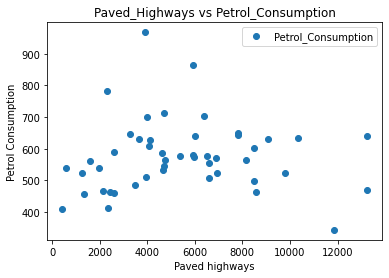

In [22]:
# Paved_Highways vs Petrol_Consumption
data.plot(x = 'Paved_Highways', y = 'Petrol_Consumption', style = 'o')
plt.title('Paved_Highways vs Petrol_Consumption')
plt.xlabel('Paved highways')
plt.ylabel('Petrol Consumption')
plt.show()

In [23]:
data[['Paved_Highways','Petrol_Consumption']].corr()

,Paved_Highways,Petrol_Consumption
Paved_Highways,1.000000,0.009852
Petrol_Consumption,0.009852,1.000000


Here, there is no linear relationship between paved_highways and petrol_consumption. So we are trying transformations of paved_highways.

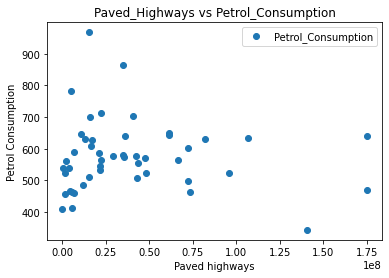

In [24]:
# Transforamtions of Paved_Highways
data['PH_transform_1'] = np.square(data['Paved_Highways'])
data.plot(x = 'PH_transform_1', y = 'Petrol_Consumption', style = 'o')
plt.title('Paved_Highways vs Petrol_Consumption')
plt.xlabel('Paved highways')
plt.ylabel('Petrol Consumption')
plt.show()

In [25]:
data[['PH_transform_1','Petrol_Consumption']].corr()

,PH_transform_1,Petrol_Consumption
PH_transform_1,1.000000,-0.090403
Petrol_Consumption,-0.090403,1.000000


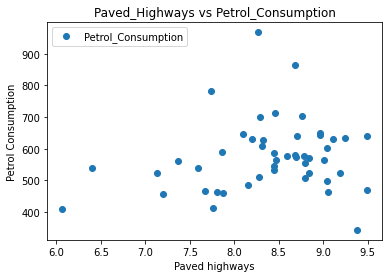

In [26]:
data['PH_transform_2'] = np.log(data['Paved_Highways'])
data.plot(x = 'PH_transform_2', y = 'Petrol_Consumption', style = 'o')
plt.title('Paved_Highways vs Petrol_Consumption')
plt.xlabel('Paved highways')
plt.ylabel('Petrol Consumption')
plt.show()

In [27]:
data[['PH_transform_2','Petrol_Consumption']].corr()

,PH_transform_2,Petrol_Consumption
PH_transform_2,1.000000,0.165334
Petrol_Consumption,0.165334,1.000000


/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


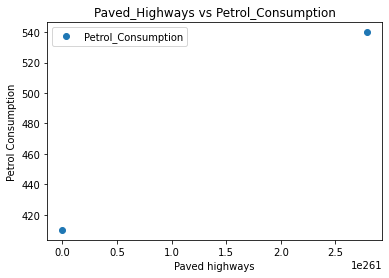

In [28]:
data['PH_transform_3'] = np.exp(data['Paved_Highways'])
data.plot(x = 'PH_transform_3', y = 'Petrol_Consumption', style = 'o')
plt.title('Paved_Highways vs Petrol_Consumption')
plt.xlabel('Paved highways')
plt.ylabel('Petrol Consumption')
plt.show()

In [29]:
data[['PH_transform_3','Petrol_Consumption']].corr()

,PH_transform_3,Petrol_Consumption
PH_transform_3,NaN,0.0
Petrol_Consumption,0.0,1.0


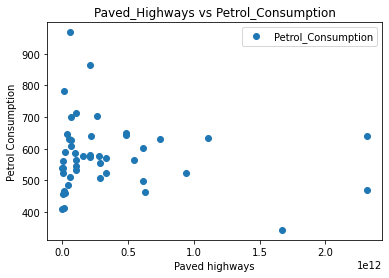

In [30]:
data['PH_transform_4'] = np.power(data['Paved_Highways'],3)
data.plot(x = 'PH_transform_4', y = 'Petrol_Consumption', style = 'o')
plt.title('Paved_Highways vs Petrol_Consumption')
plt.xlabel('Paved highways')
plt.ylabel('Petrol Consumption')
plt.show()

In [31]:
data[['PH_transform_4','Petrol_Consumption']].corr()

,PH_transform_4,Petrol_Consumption
PH_transform_4,1.000000,-0.134562
Petrol_Consumption,-0.134562,1.000000


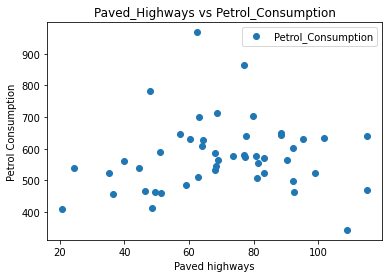

In [32]:
data['PH_transform_5'] = np.power(data['Paved_Highways'],0.5)
data.plot(x = 'PH_transform_5', y = 'Petrol_Consumption', style = 'o')
plt.title('Paved_Highways vs Petrol_Consumption')
plt.xlabel('Paved highways')
plt.ylabel('Petrol Consumption')
plt.show()

In [33]:
data[['PH_transform_5','Petrol_Consumption']].corr()

,PH_transform_5,Petrol_Consumption
PH_transform_5,1.000000,0.084753
Petrol_Consumption,0.084753,1.000000


Even after trying all transformations, still there is no linear relationship between paved_highways and petrol_consumption.

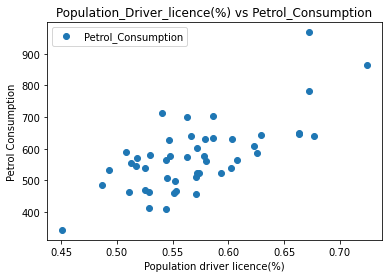

In [34]:
# Population_Driver_licence(%) vs Petrol_Consumption
data.plot(x = 'Population_Driver_licence(%)', y = 'Petrol_Consumption', style = 'o')
plt.title('Population_Driver_licence(%) vs Petrol_Consumption')
plt.xlabel('Population driver licence(%)')
plt.ylabel('Petrol Consumption')
plt.show()

In [35]:
data[['Population_Driver_licence(%)','Petrol_Consumption']].corr()

,Population_Driver_licence(%),Petrol_Consumption
Population_Driver_licence(%),1.000000,0.698965
Petrol_Consumption,0.698965,1.000000


Here, there is a linear relationship between population_driver_licence(%) and petrol_consumption.

In [36]:
data[['Petrol_tax','Average_income','Paved_Highways','Population_Driver_licence(%)','Petrol_Consumption']].corr()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
Petrol_tax,1.000000,0.012665,-0.491335,-0.288037,-0.451280
Average_income,0.012665,1.000000,0.056171,0.157070,-0.244862
Paved_Highways,-0.491335,0.056171,1.000000,-0.063388,0.009852
Population_Driver_licence(%),-0.288037,0.157070,-0.063388,1.000000,0.698965
Petrol_Consumption,-0.451280,-0.244862,0.009852,0.698965,1.000000


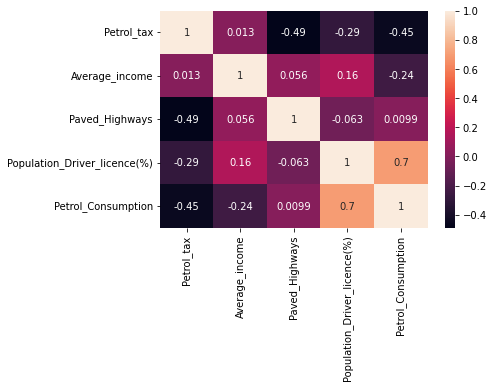

In [37]:
sns.heatmap(data[['Petrol_tax','Average_income','Paved_Highways','Population_Driver_licence(%)','Petrol_Consumption']].corr(), annot = True)

In this plot, we can see the correlation of all features vs target.

Since paved_highways has no linear relationship with petrol_consumption, we will drop this feature for our model training.

As 3 features namely petrol_tax, average_income and population_driver_licence(%) are included in our model, it will be a Multiple Linear Regression Model.

***Data prepartion***

In [38]:
X = data[['Petrol_tax','Average_income','Population_Driver_licence(%)']].values
y = data['Petrol_Consumption'].values

Taking all the features in X variable and the target in y variable.

And we are splitting the data into train and test.


*   75% for training
*   25% for testing



In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 555)

In [40]:
X_train.shape, X_test.shape

((36, 3), (12, 3))

We have scaled the data using Standard Scaler.

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

***Model training***

In [42]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

We have trained our Multiple Linear Regression Model.

Our model is **y = m1X1 + m2X2 + m3X3 + c** where m1,m2,m3 are coefficients and c is the intercept.

In [43]:
coef = pd.DataFrame(regressor.coef_,['Petrol_tax', 'Average_income', 'Population_Driver_licence(%)'], columns = ['coefficient'])
coef

,coefficient
Petrol_tax,-26.242543
Average_income,-36.231422
Population_Driver_licence(%),65.809417


In [44]:
regressor.intercept_

583.5000000000001

After training the model, we have found out accurate values for coefficients(m1, m2, m3) and intercept(c).

***Prediction***

In [45]:
y_pred = regressor.predict(X_test_scaled)

In [46]:
df = pd.DataFrame({'Actual_value' : y_test, 'Predicted_value' : y_pred})
df

,Actual_value,Predicted_value
0,344,337.995502
1,467,479.748605
2,603,595.946678
3,561,572.165554
4,457,430.070187
5,571,567.070144
6,704,634.923666
7,635,605.833680
8,471,458.850610
9,460,501.018541


Here, we have compared the predicted values with the original values.

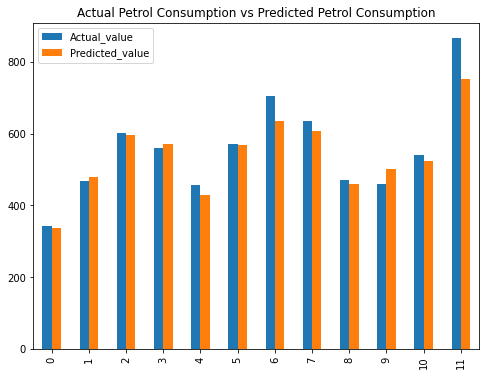

In [47]:
df.plot(kind = 'bar', figsize = (8,6))
plt.title('Actual Petrol Consumption vs Predicted Petrol Consumption')
plt.show()

As we can see from the graph, our prediction is most accurate.

In [48]:
regressor.predict(scaler.transform(np.array([[8.5,5340,0.656]])))

array([580.28426043])

Testing the model for additional inputs.

***Feature importance***

In [49]:
coef = pd.DataFrame(regressor.coef_,['Petrol_tax', 'Average_income', 'Population_Driver_licence(%)'], columns = ['coefficient'])
coef

,coefficient
Petrol_tax,-26.242543
Average_income,-36.231422
Population_Driver_licence(%),65.809417


As we can see from the dataframe, comparing the absolute value of all the coefficients, the feature 'Population_Driver_licence(%)' has higher value of 65, then comes the 'Average_income' of 36 and at last 'Petrol_tax' of 26.

From this, we can conclude the importance of the features which has more impact on predicting Petrol_Consumption are in the order:


1.   Population_Driver_licence(%)
2.   Average_income
3.   Petrol_tax





***Evaluation of model***

In [50]:
from sklearn import metrics
print('R2 - Score :', metrics.r2_score(y_test, y_pred))

R2 - Score : 0.89468112419905


From this, we can see that the R2 - Score value is 0.89 which is very good.

So we can conclude saying that our model accuracy is 89% which means this is a very good model.